In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/ProyectoOptimizacion/all_faults_dataset.csv"
df = pd.read_csv(filename)

df.describe()

,inside,R,X,V,I,rel_location,Rf
count,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06,2.006400e+06
mean,5.899123e-02,6.870995e+16,6.886670e+16,6.740994e-01,1.401671e+00,5.000000e+01,5.000000e+00
std,2.356083e-01,4.866293e+19,4.877397e+19,2.270742e-01,1.478020e+00,3.133689e+01,3.535535e+00
min,0.000000e+00,-7.688535e+04,-3.706182e+04,8.323653e-04,6.436310e-05,1.000000e+00,0.000000e+00
25%,0.000000e+00,-6.821541e+01,-8.294042e+01,5.179271e-01,5.583650e-01,2.000000e+01,2.500000e+00
50%,0.000000e+00,3.789436e+00,4.376807e+00,7.210019e-01,9.139524e-01,5.000000e+01,5.000000e+00
75%,0.000000e+00,7.152275e+01,9.412817e+01,8.602312e-01,1.875863e+00,8.000000e+01,7.500000e+00
max,1.000000e+00,3.450000e+22,3.458704e+22,1.018221e+00,4.276524e+01,9.900000e+01,1.000000e+01


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as np

import time

from sklearn.base import TransformerMixin  # gives fit_transform method for free


In [ ]:
X = df[["Relay", "R", "X"]]
X.loc[:, "R"] = df[["R"]].clip(lower=-100, upper=100)
X.loc[:, "X"] = df[["X"]].clip(lower=-100, upper=100)
y = df["inside"]

<ipython-input-10-4efafacce019>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "R"] = df[["R"]].clip(lower=-100, upper=100)
<ipython-input-10-4efafacce019>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "X"] = df[["X"]].clip(lower=-100, upper=100)


In [ ]:
le = LabelEncoder()
X.loc[:, "Relay"] = le.fit_transform(X["Relay"]).reshape(-1, 1)

<ipython-input-11-bef2b3e60ea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "Relay"] = le.fit_transform(X["Relay"]).reshape(-1, 1)
<ipython-input-11-bef2b3e60ea6>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, "Relay"] = le.fit_transform(X["Relay"]).reshape(-1, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(1404480, 3)

In [ ]:

clf = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
)


now = time.time()
print("training")
clf.fit(X_train, y_train.to_numpy())
print(f"Time taken: {time.time() - now} seconds")


training
Time taken: 2.278841733932495 seconds


In [ ]:
X_test.head(100)

,Relay,R,X
1707895,19,-100.000000,100.000000
837032,28,13.652711,30.801921
1411176,14,98.285079,49.440612
67850,20,0.318192,-7.300636
1035994,5,-57.462862,-55.095361
...,...,...,...
1932780,17,61.265392,-70.704534
1180772,23,100.000000,100.000000
457373,30,-100.000000,14.359939
1245303,28,-100.000000,100.000000


In [ ]:
y_test_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))


[[565379    793]
 [  1117  34631]]


In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(
    # -------------------------------------------------------------------------
    # The object to use to fit the data. Must implement fit()
    estimator=clf,
    # -------------------------------------------------------------------------
    # The data to fit. Can be for example a list, or an array.
    X=X,
    # -------------------------------------------------------------------------
    # The target variable to try to predict in the case of supervised learning.
    y=y,
    # -------------------------------------------------------------------------
    # Group labels for the samples used while splitting the dataset into
    # train/test set. Only used in conjunction with a “Group” cv instance
    # (e.g., GroupKFold).
    groups=None,
    # -------------------------------------------------------------------------
    # Determines the cross-validation splitting strategy.
    cv=3,
    # -------------------------------------------------------------------------
    # The verbosity level.
    verbose=0,
    # -------------------------------------------------------------------------
    # Parameters to pass to the fit method of the estimator.
    fit_params=None,
    # -------------------------------------------------------------------------
    # The method to be invoked by estimator.
    # * 'predict'
    # * 'predict_proba'
    # * 'predict_log_proba'
    # * 'decision_function'
    method='predict',
)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    # -------------------------------------------------------------------------
    # The object to use to fit the data. Must implement fit()
    estimator=clf,
    # -------------------------------------------------------------------------
    # The data to fit. Can be for example a list, or an array.
    X=X,
    # -------------------------------------------------------------------------
    # The target variable to try to predict in the case of supervised learning.
    y=y,
    # -------------------------------------------------------------------------
    # Group labels for the samples used while splitting the dataset into
    # train/test set. Only used in conjunction with a “Group” cv instance
    # (e.g., GroupKFold).
    groups=None,
    # -------------------------------------------------------------------------
    # Determines the cross-validation splitting strategy.
    cv=3,
    # -------------------------------------------------------------------------
    # The verbosity level.
    verbose=0,
    # -------------------------------------------------------------------------
    # Parameters to pass to the fit method of the estimator.
    fit_params=None,
    # -------------------------------------------------------------------------
    #
    error_score=np.nan,
    scoring="f1"
)

array([0.93288582, 0.92294576, 0.9413098 ])

Determinación del tamaño óptimo del dataset con learning_curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.svm import SVC

In [ ]:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

train_sizes = np.linspace(0.1, 1.0, 5)

In [ ]:
train_sizes_abs, train_scores, test_scores, fit_times, score_times = learning_curve(
    # -------------------------------------------------------------------------
    # An object of that type which is cloned for each validation.
    estimator=clf,
    # -------------------------------------------------------------------------
    # Training vector, where n_samples is the number of samples and n_features
    # is the number of features.
    X=X,
    # -------------------------------------------------------------------------
    # Target relative to X for classification or regression
    y=y,
    # -------------------------------------------------------------------------
    # Determines the cross-validation splitting strategy
    cv=cv,
    # -------------------------------------------------------------------------
    # Relative or absolute numbers of training examples that will be used to
    # generate the learning curve.
    train_sizes=train_sizes,
    # -------------------------------------------------------------------------
    # Whether to return the fit and score times.
    return_times=True,
)

In [ ]:
def compute_mean_std(x):
    return np.mean(x, axis=1), np.std(x, axis=1)


train_scores_mean, train_scores_std = compute_mean_std(train_scores)
test_scores_mean, test_scores_std = compute_mean_std(test_scores)
fit_times_mean, fit_times_std = compute_mean_std(fit_times)
score_times_mean, score_times_std = compute_mean_std(score_times)

In [ ]:
def plot_result(x, mean, std, color, label=None):
    plt.fill_between(x, mean - std, mean + std, alpha=0.1, color=color)
    plt.plot(x, mean, "o-", color=color, label=label)


def format_plot():
    plt.gca().grid()
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

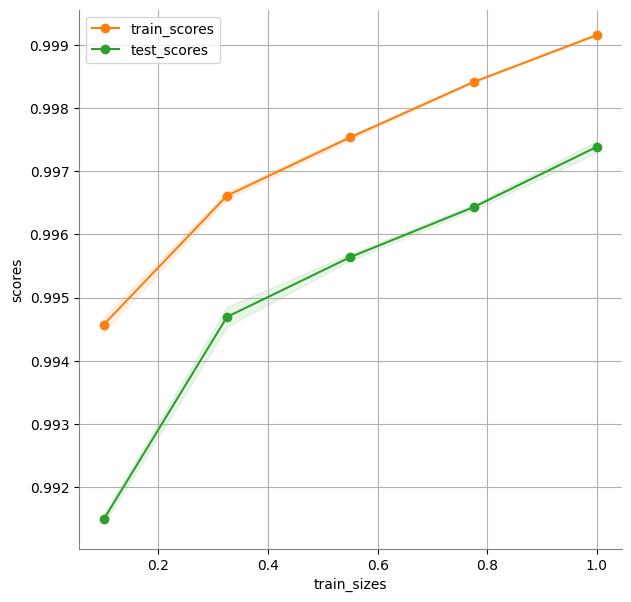

In [ ]:
plt.figure(figsize=(7, 7))

plot_result(
    x=train_sizes,
    mean=train_scores_mean,
    std=train_scores_std,
    color="tab:orange",
    label="train_scores",
)

plot_result(
    x=train_sizes,
    mean=test_scores_mean,
    std=test_scores_std,
    color="tab:green",
    label="test_scores",
)

format_plot()
plt.legend(loc="best")
plt.xlabel("train_sizes")
plt.ylabel("scores")
plt.show()

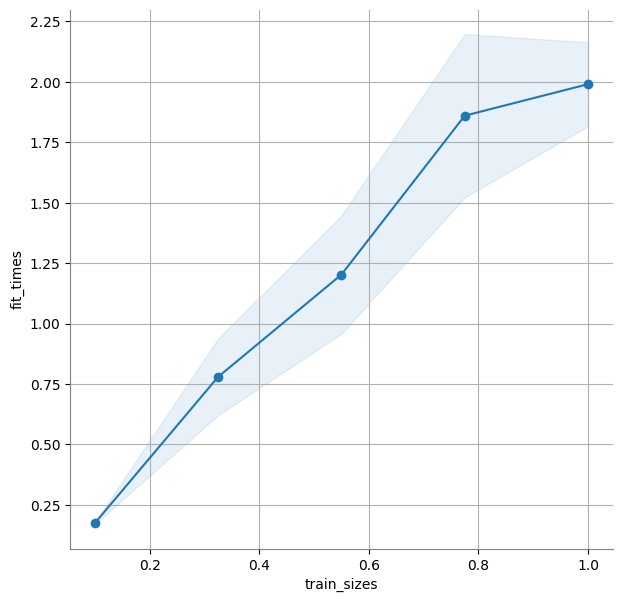

In [ ]:
plt.figure(figsize=(7, 7))

plot_result(
    x=train_sizes,
    mean=fit_times_mean,
    std=fit_times_std,
    color="tab:blue",
)


format_plot()

plt.xlabel("train_sizes")
plt.ylabel("fit_times")
plt.show()

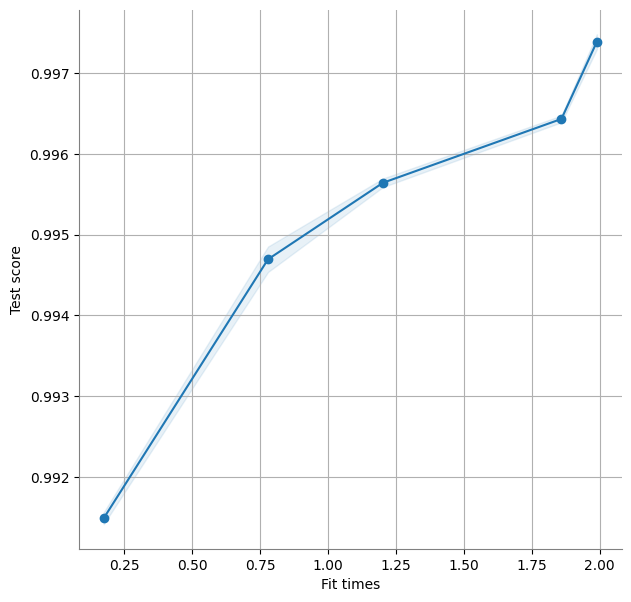

In [ ]:
plt.figure(figsize=(7, 7))

plot_result(
    x=fit_times_mean, mean=test_scores_mean, std=test_scores_std, color="tab:blue"
)

format_plot()

plt.xlabel("Fit times")
plt.ylabel("Test score")
plt.show()

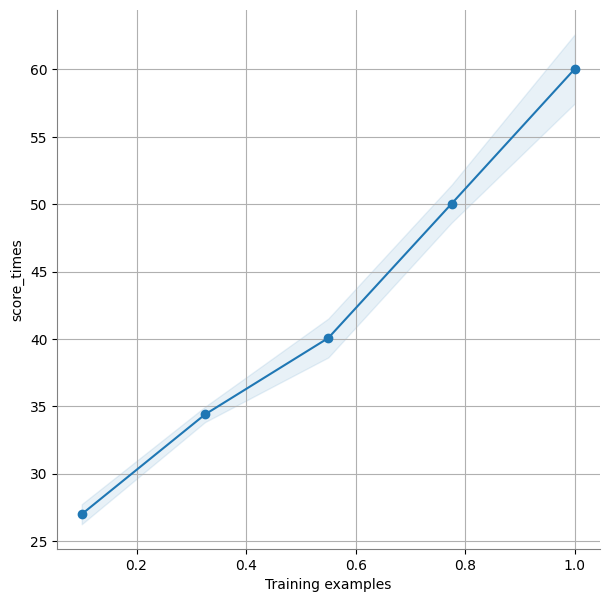

In [ ]:
plt.figure(figsize=(7, 7))

plot_result(x=train_sizes, mean=score_times_mean, std=score_times_std, color="tab:blue")
format_plot()

plt.xlabel("Training examples")
plt.ylabel("score_times")
plt.show()

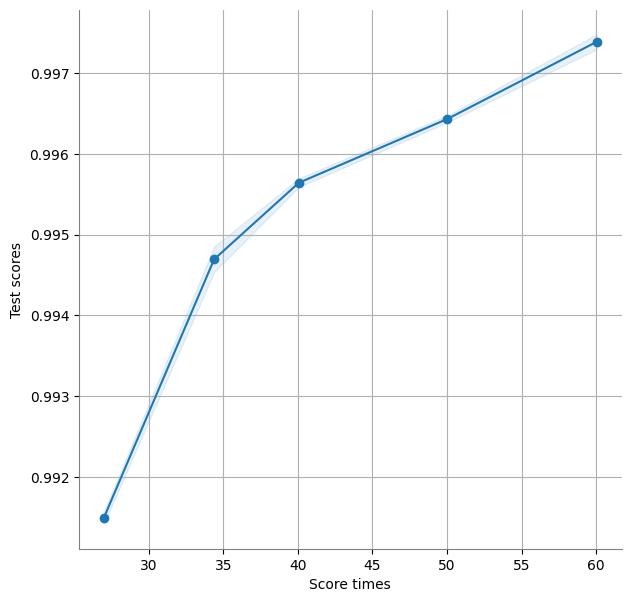

In [ ]:
plt.figure(figsize=(7, 7))

plot_result(
    x=score_times_mean,
    mean=test_scores_mean,
    std=test_scores_std,
    color="tab:blue",
)


format_plot()

plt.xlabel("Score times")
plt.ylabel("Test scores")
plt.show()

Evaluación con varias métricas
https://jdvelasq.github.io/courses/modulos/sklearn/07%20introduccion%20al%20uso%20de%20metricas/notebooks/04%20evaluacion%20con%20varias%20metricas.html

In [ ]:
scoring = {
    "recall":"recall",
    "balanced_accuracy": "balanced_accuracy",
    "f1":"f1",
    "accuracy": "accuracy",
}

In [ ]:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {
        "tn": cm[0, 0],
        "fp": cm[0, 1],
        "fn": cm[1, 0],
        "tp": cm[1, 1],
    }

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    clf,
    X,
    y,
    cv=5,
    scoring=scoring,
)

In [ ]:
cv_results

{'fit_time': array([2.70514059, 2.75709462, 2.97538376, 3.77056503, 2.70722461]),
 'score_time': array([0.335536  , 0.32219768, 0.59481812, 0.48311639, 0.31505251]),
 'test_recall': array([0.95272896, 0.93667624, 0.93355019, 0.94765968, 0.94778641]),
 'test_balanced_accuracy': array([0.97494105, 0.96607652, 0.9644976 , 0.9717801 , 0.97222084]),
 'test_f1': array([0.95361522, 0.93255946, 0.93066055, 0.9415147 , 0.94724621]),
 'test_accuracy': array([0.9945325 , 0.99200807, 0.99179376, 0.99305472, 0.99377243])}

---
full plot


In [ ]:

def create_grid_plot(train_scores_mean, train_scores_std ,test_scores_mean, test_scores_std,fit_times_mean, fit_times_std, score_times_mean, score_times_std ):
  #############################
  # Create a 2x2 grid of plots
  plt.subplot(2, 2, 1)
  plot_result(
      x=train_sizes,
      mean=fit_times_mean,
      std=fit_times_std,
      color="tab:blue",
  )


  format_plot()

  plt.xlabel("train_sizes")
  plt.ylabel("fit_times")
  plt.title("fit_times vs train_sizes")

  #############################
  plt.subplot(2, 2, 2)
  plot_result(
      x=fit_times_mean, mean=test_scores_mean, std=test_scores_std, color="tab:blue"
  )

  format_plot()

  plt.xlabel("Fit times")
  plt.ylabel("Test score")
  plt.title("Test score vs Fit times")
  #############################
  plt.subplot(2, 2, 3)

  plot_result(x=train_sizes, mean=score_times_mean, std=score_times_std, color="tab:blue")
  format_plot()

  plt.xlabel("Training examples")
  plt.ylabel("score_times")
  plt.title("score_times vs Training examples")
  #############################
  plt.subplot(2, 2, 4)

  plot_result(
      x=score_times_mean,
      mean=test_scores_mean,
      std=test_scores_std,
      color="tab:blue",
  )


  format_plot()

  plt.xlabel("Score times")
  plt.ylabel("Test scores")
  plt.title("Test scores vs Score times")
  # Adjust layout for better spacing
  plt.tight_layout()

  # Show the plots
  plt.show()

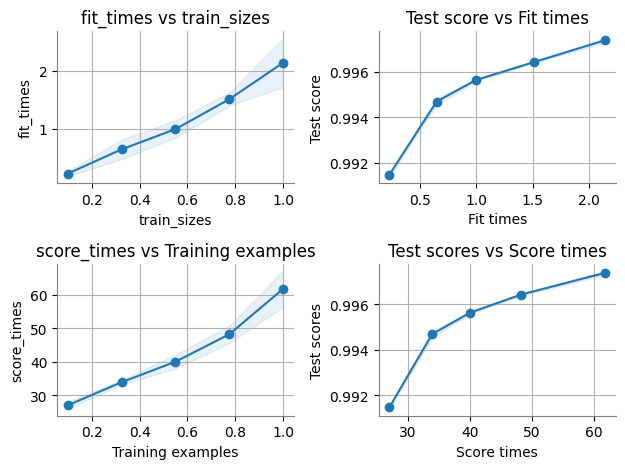

In [ ]:
create_grid_plot(train_scores_mean, train_scores_std ,test_scores_mean, test_scores_std,fit_times_mean, fit_times_std, score_times_mean, score_times_std )

In [ ]:
for vec in [train_sizes_abs, train_scores, test_scores, fit_times, score_times]:
  print(vec)

[ 160512  521664  882816 1243968 1605120]
[[0.99472937 0.99455492 0.99443032]
 [0.99657059 0.99669327 0.99657634]
 [0.9975227  0.997585   0.99750458]
 [0.9984252  0.9984035  0.99841153]
 [0.99917639 0.99913963 0.99915458]]
[[0.99158941 0.99145484 0.99141746]
 [0.99489633 0.99467205 0.99451256]
 [0.99564892 0.99570126 0.99557167]
 [0.9964389  0.99637659 0.99647877]
 [0.99749801 0.99727123 0.99739334]]
[[0.1888833  0.19983339 0.29001522]
 [0.88343978 0.527035   0.52624512]
 [1.20414782 0.91171503 0.86878777]
 [1.62212014 1.35404873 1.55976343]
 [1.89191365 1.80045056 2.73660588]]
[[28.54301238 26.18011546 26.42015862]
 [34.83877683 33.76443076 33.18482685]
 [42.15795398 40.70494819 37.26101017]
 [51.01632929 48.88010573 44.79601455]
 [67.59833932 63.12000966 54.6156733 ]]


<ipython-input-3-ce6ae201cf68>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "R"] = df[["R"]].clip(lower=-100, upper=100)
<ipython-input-3-ce6ae201cf68>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "X"] = df[["X"]].clip(lower=-100, upper=100)
<ipython-input-3-ce6ae201cf68>:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

ok


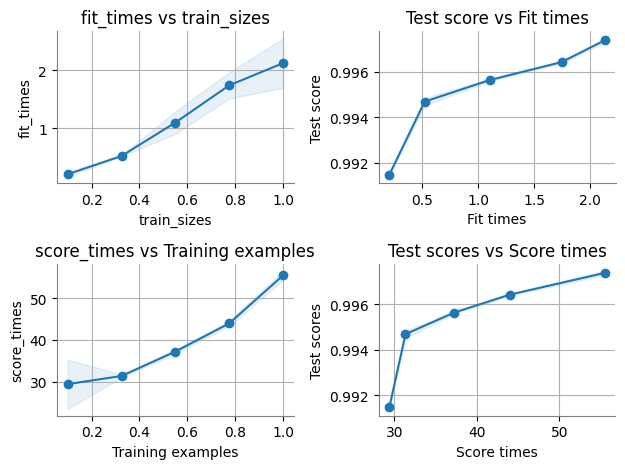

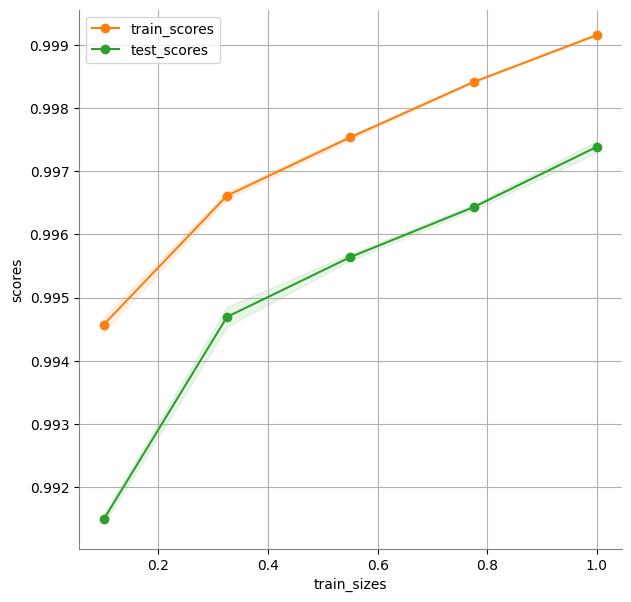

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import ShuffleSplit, learning_curve

import numpy as np

import time


def train_size_analysis_main():
    def compute_mean_std(x):
        return np.mean(x, axis=1), np.std(x, axis=1)

    def plot_result(x, mean, std, color, label=None):
        plt.fill_between(x, mean - std, mean + std, alpha=0.1, color=color)
        plt.plot(x, mean, "o-", color=color, label=label)

    def format_plot():
        plt.gca().grid()
        plt.gca().spines["left"].set_color("gray")
        plt.gca().spines["bottom"].set_color("gray")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)

    def create_grid_plot(train_scores_mean, train_scores_std,
                         test_scores_mean, test_scores_std,
                         fit_times_mean, fit_times_std,
                         score_times_mean, score_times_std):

        #############################
        # Create a 2x2 grid of plots
        plt.subplot(2, 2, 1)
        plot_result(
            x=train_sizes,
            mean=fit_times_mean,
            std=fit_times_std,
            color="tab:blue",
        )

        format_plot()

        plt.xlabel("train_sizes")
        plt.ylabel("fit_times")
        plt.title("fit_times vs train_sizes")

        #############################
        plt.subplot(2, 2, 2)
        plot_result(
            x=fit_times_mean, mean=test_scores_mean, std=test_scores_std, color="tab:blue"
        )

        format_plot()

        plt.xlabel("Fit times")
        plt.ylabel("Test score")
        plt.title("Test score vs Fit times")
        #############################
        plt.subplot(2, 2, 3)

        plot_result(x=train_sizes, mean=score_times_mean, std=score_times_std, color="tab:blue")
        format_plot()

        plt.xlabel("Training examples")
        plt.ylabel("score_times")
        plt.title("score_times vs Training examples")
        #############################
        plt.subplot(2, 2, 4)

        plot_result(
            x=score_times_mean,
            mean=test_scores_mean,
            std=test_scores_std,
            color="tab:blue",
        )

        format_plot()

        plt.xlabel("Score times")
        plt.ylabel("Test scores")
        plt.title("Test scores vs Score times")
        # Adjust layout for better spacing
        plt.tight_layout()

        # Show the plots
        plt.show()
        #plt.savefig('results/KNN/Train_test_split_6.png')

    def create_main_score_train_size_plot(train_scores_mean, train_scores_std,
                                          test_scores_mean, test_scores_std, ):
        plt.figure(figsize=(7, 7))

        plot_result(
            x=train_sizes,
            mean=train_scores_mean,
            std=train_scores_std,
            color="tab:orange",
            label="train_scores",
        )

        plot_result(
            x=train_sizes,
            mean=test_scores_mean,
            std=test_scores_std,
            color="tab:green",
            label="test_scores",
        )

        format_plot()
        plt.legend(loc="best")
        plt.xlabel("train_sizes")
        plt.ylabel("scores")
        plt.show()
        #plt.savefig('results/KNN/Train_test_split_7.png')

    filename = "/content/drive/MyDrive/Colab Notebooks/ProyectoAnalitica/all_faults_dataset.csv"
    df = pd.read_csv(filename)

    X = df[["Relay", "R", "X"]]
    X.loc[:, "R"] = df[["R"]].clip(lower=-100, upper=100)
    X.loc[:, "X"] = df[["X"]].clip(lower=-100, upper=100)
    y = df["inside"]

    le = LabelEncoder()
    X.loc[:, "Relay"] = le.fit_transform(X["Relay"]).reshape(-1, 1)

    clf = KNeighborsClassifier(
        # -----------------------------------------------------
        # Number of neighbors to use by default for kneighbors
        # queries.
        n_neighbors=5,
        # -----------------------------------------------------
        # 'auto', 'ball_tree', 'kd_tree', 'brute'
        algorithm="auto",
    )

    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

    train_sizes = np.linspace(0.1, 1.0, 5)
    print("ok")
    train_sizes_abs, train_scores, test_scores, fit_times, score_times = learning_curve(
        # -------------------------------------------------------------------------
        # An object of that type which is cloned for each validation.
        estimator=clf,
        # -------------------------------------------------------------------------
        # Training vector, where n_samples is the number of samples and n_features
        # is the number of features.
        X=X,
        # -------------------------------------------------------------------------
        # Target relative to X for classification or regression
        y=y,
        # -------------------------------------------------------------------------
        # Determines the cross-validation splitting strategy
        cv=cv,
        # -------------------------------------------------------------------------
        # Relative or absolute numbers of training examples that will be used to
        # generate the learning curve.
        train_sizes=train_sizes,
        # -------------------------------------------------------------------------
        # Whether to return the fit and score times.
        return_times=True,
    )

    train_scores_mean, train_scores_std = compute_mean_std(train_scores)
    test_scores_mean, test_scores_std = compute_mean_std(test_scores)
    fit_times_mean, fit_times_std = compute_mean_std(fit_times)
    score_times_mean, score_times_std = compute_mean_std(score_times)

    create_grid_plot(
        train_scores_mean, train_scores_std,
        test_scores_mean, test_scores_std,
        fit_times_mean, fit_times_std,
        score_times_mean, score_times_std
    )
    create_main_score_train_size_plot(
        train_scores_mean, train_scores_std,
        test_scores_mean, test_scores_std,
    )


if __name__ == "__main__":
    train_size_analysis_main()
